In [ ]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image 
from google.colab import files 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 

%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


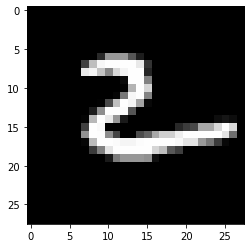

In [ ]:
n = 109

plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [ ]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [ ]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255 

**Работа с правильными ответами**

In [ ]:
print(y_train_org[n])

2


**Преобразуем метки в формат one hot encoding**

In [ ]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Правильный ответ в формате one hot encoding**

In [ ]:
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_train[n])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [ ]:
model = Sequential()

**Добавляем уровни сети**


In [ ]:
model.add(Dense(128, input_dim=784, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [ ]:
model.fit(x_train, y_train, batch_size=200, epochs=15,  verbose=1, validation_split=0.2)

Epoch 1/15
240/240 [==============================] - 6s 9ms/step - loss: 0.4178 - accuracy: 0.8825 - val_loss: 0.1853 - val_accuracy: 0.9482
Epoch 2/15
240/240 [==============================] - 2s 7ms/step - loss: 0.1660 - accuracy: 0.9509 - val_loss: 0.1381 - val_accuracy: 0.9616
Epoch 3/15
240/240 [==============================] - 2s 7ms/step - loss: 0.1187 - accuracy: 0.9646 - val_loss: 0.1166 - val_accuracy: 0.9665
Epoch 4/15
240/240 [==============================] - 2s 7ms/step - loss: 0.0907 - accuracy: 0.9739 - val_loss: 0.1097 - val_accuracy: 0.9672
Epoch 5/15
240/240 [==============================] - 1s 4ms/step - loss: 0.0708 - accuracy: 0.9786 - val_loss: 0.1005 - val_accuracy: 0.9708
Epoch 6/15
240/240 [==============================] - 2s 7ms/step - loss: 0.0580 - accuracy: 0.9825 - val_loss: 0.1004 - val_accuracy: 0.9703
Epoch 7/15
240/240 [==============================] - 2s 6ms/step - loss: 0.0466 - accuracy: 0.9862 - val_loss: 0.0913 - val_accuracy: 0.9733
Epoch 

## Сохраняем обученную нейронную сеть

Записываем обученную нейронную сеть в файл `mnist_dense.h5`

In [ ]:
model.save("mnist_dense.h5")

Проверяем, что файл сохранился

In [ ]:
!ls

mnist_dense.h5	sample_data


**Сохраняем файлы на локальный компьютер**

In [ ]:
files.download("mnist_dense.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Используем сеть для распознавания рукописных цифр

In [ ]:
n_rec = 2010

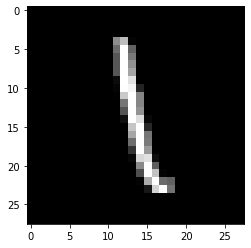

In [ ]:
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

**Меняем размерность изображения и нормализуем его**

In [ ]:
x = x_test[n_rec]

x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [ ]:
prediction = model.predict(x)

1/1 [==============================] - 0s 74ms/step


**Печатаем результаты распознавания**

In [ ]:
print(prediction)

[[9.7085673e-09 9.9897742e-01 4.1577282e-06 6.5665804e-06 4.0620085e-05
  2.5424917e-04 2.2163456e-07 3.3640167e-06 6.8370323e-04 2.9794999e-05]]


**Преобразуем результаты из формата one hot encoding**

In [ ]:
prediction = np.argmax(prediction)
print(prediction)

1


**Печатаем правильный ответ**

In [ ]:
print(y_test_org[n_rec])

1


## Загружаем свою картинку

In [ ]:
files.upload()

Проверяем загрузку картинки

In [ ]:
!ls

Загружаем картинку из файла

In [ ]:
img_path = 'Снимок экрана 2022-11-18 в 23.57.00.png'

img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

In [ ]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [ ]:
x = image.img_to_array(img)

x = x.reshape(1, 784)

x = 255 - x

x /= 255

Запускаем распознавание

In [ ]:
prediction = model.predict(x)

Результаты распознавания

In [ ]:
prediction

In [ ]:
print(np.argmax(prediction))